## Corpus Analysis

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

jeopardy_df = pd.read_csv('JEOPARDY_CSV.csv')
jeopardy_df = jeopardy_df.rename(columns={' Question': 'Question', ' Answer': 'Answer', ' Category': 'Category', " Air Date": "Air Date"})

# drop NaN values
print(jeopardy_df[jeopardy_df['Answer'].isnull()])
jeopardy_df.drop(jeopardy_df.index[[94817, 143297]], inplace=True)

# drop 
mask = jeopardy_df['Question'].str.contains("<")
jeopardy_df = jeopardy_df[~mask]


# combine ' Question' column and ' Answer' column
jeopardy_df['Document'] = jeopardy_df['Question'] + " " + jeopardy_df['Answer']

# change date to year only
jeopardy_df['Air Date'] = jeopardy_df['Air Date'].str[:4]


        Show Number    Air Date             Round                Category  \
94817          4346  2003-06-23         Jeopardy!           GOING "N"SANE   
143297         6177  2011-06-21  Double Jeopardy!                 NOTHING   
178922         4573  2004-06-23         Jeopardy!  MUCH ADO ABOUT NOTHING   

        Value                                           Question Answer  
94817    $200                       It often precedes "and void"    NaN  
143297   $400  This word for "nothing" precedes "and void" to...    NaN  
178922   $200  Completes the title of the 1939 book by Agatha...    NaN  


Number of documents: 206194
Number of questtions per year:
Air Date
1984     1154
1985      878
1986     1392
1987     1260
1988     1272
1989     2051
1990     4324
1991     1437
1992     1879
1993     2126
1994     1135
1995     1135
1996     4880
1997    13011
1998    12910
1999    13503
2000    13355
2001    11787
2002     6663
2003     9314
2004    12449
2005    12291
2006    12350
2007    12574
2008    12813
2009    12393
2010    12541
2011    12299
2012     1018
Name: count, dtype: int64
10 most common Answers
Answer
China         210
Australia     208
Japan         188
Chicago       187
France        187
India         179
California    178
Canada        173
Spain         168
Alaska        159
Name: count, dtype: int64


/var/folders/6x/px2c4wgd07122kszz5ljmxgw0000gn/T/ipykernel_95058/277804662.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Answer', data=jeopardy_df[mask], palette=sns.color_palette("Blues", 10), order=top10.index.tolist())


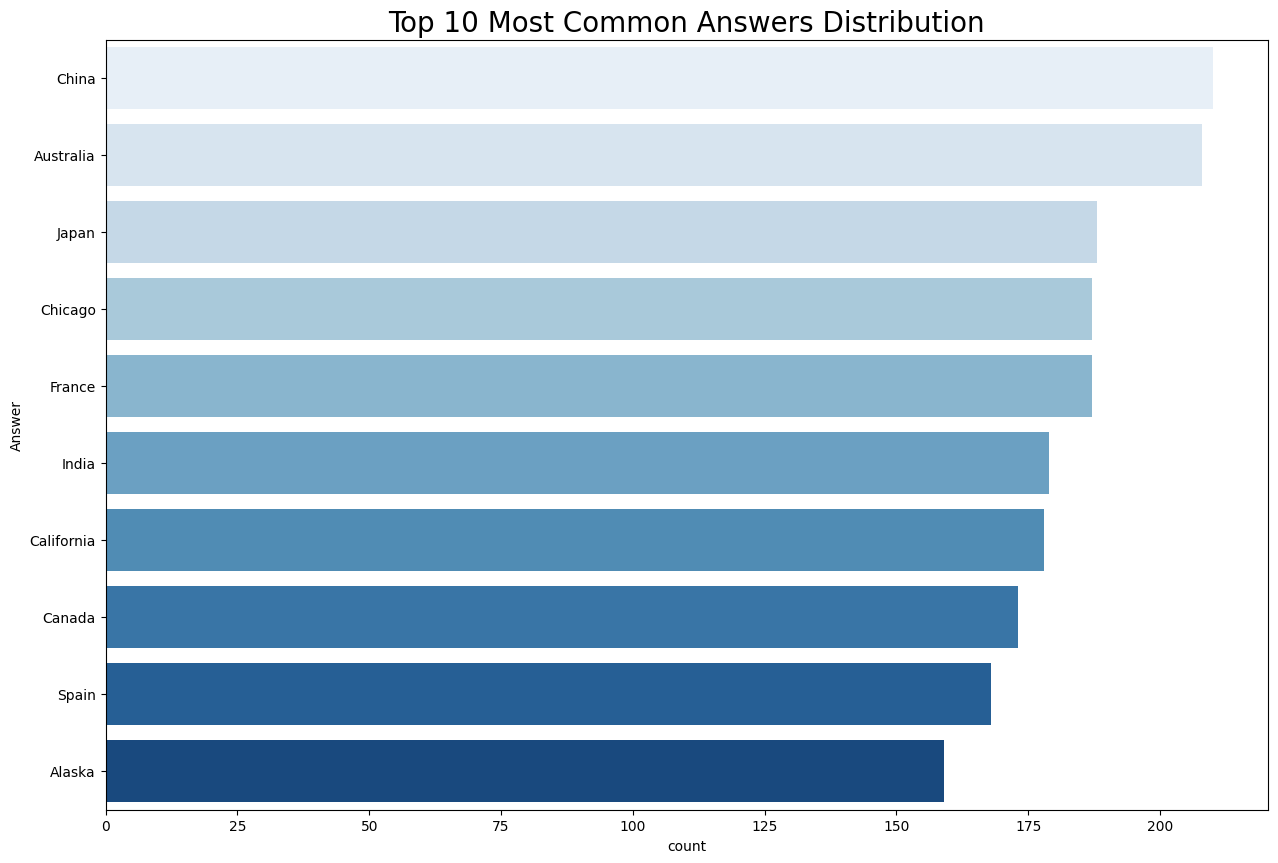

In [53]:
sample_df = jeopardy_df.sample(100)


# number of documents 
print("Number of documents:", len(jeopardy_df))

print("Number of questtions per year:")
print(jeopardy_df['Air Date'].value_counts().sort_index())

print("10 most common Answers")
top10 = jeopardy_df['Answer'].value_counts()[:10]
print(top10)

# Visualize top 10 Answers:
mask = jeopardy_df['Answer'].map(lambda x: x in top10.index.tolist())

sns.countplot(y='Answer', data=jeopardy_df[mask], palette=sns.color_palette("Blues", 10), order=top10.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Most Common Answers Distribution', size=20)

plt.savefig("top10_answers.png")

Number of unique categories: 27331
10 most common cateogires
Category
BEFORE & AFTER             545
LITERATURE                 490
SCIENCE                    476
AMERICAN HISTORY           413
POTPOURRI                  383
WORLD HISTORY              374
WORD ORIGINS               365
COLLEGES & UNIVERSITIES    348
HISTORY                    347
SPORTS                     340
Name: count, dtype: int64
Question
Hainan                4
Greenland             4
Abigail Smith         4
Iron pyrite           3
"You Must Love Me"    3
Walk like a duck      3
Argentina             3
Thomas Jefferson      3
Egypt                 3
Kate Hudson           3
Name: count, dtype: int64


/var/folders/6x/px2c4wgd07122kszz5ljmxgw0000gn/T/ipykernel_95058/2092244363.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=jeopardy_df[mask_c], palette=sns.color_palette("Blues", 10), order=top10_c.index.tolist())


10 most common questions
Question
Hainan                4
Greenland             4
Abigail Smith         4
Iron pyrite           3
"You Must Love Me"    3
Walk like a duck      3
Argentina             3
Thomas Jefferson      3
Egypt                 3
Kate Hudson           3
Name: count, dtype: int64


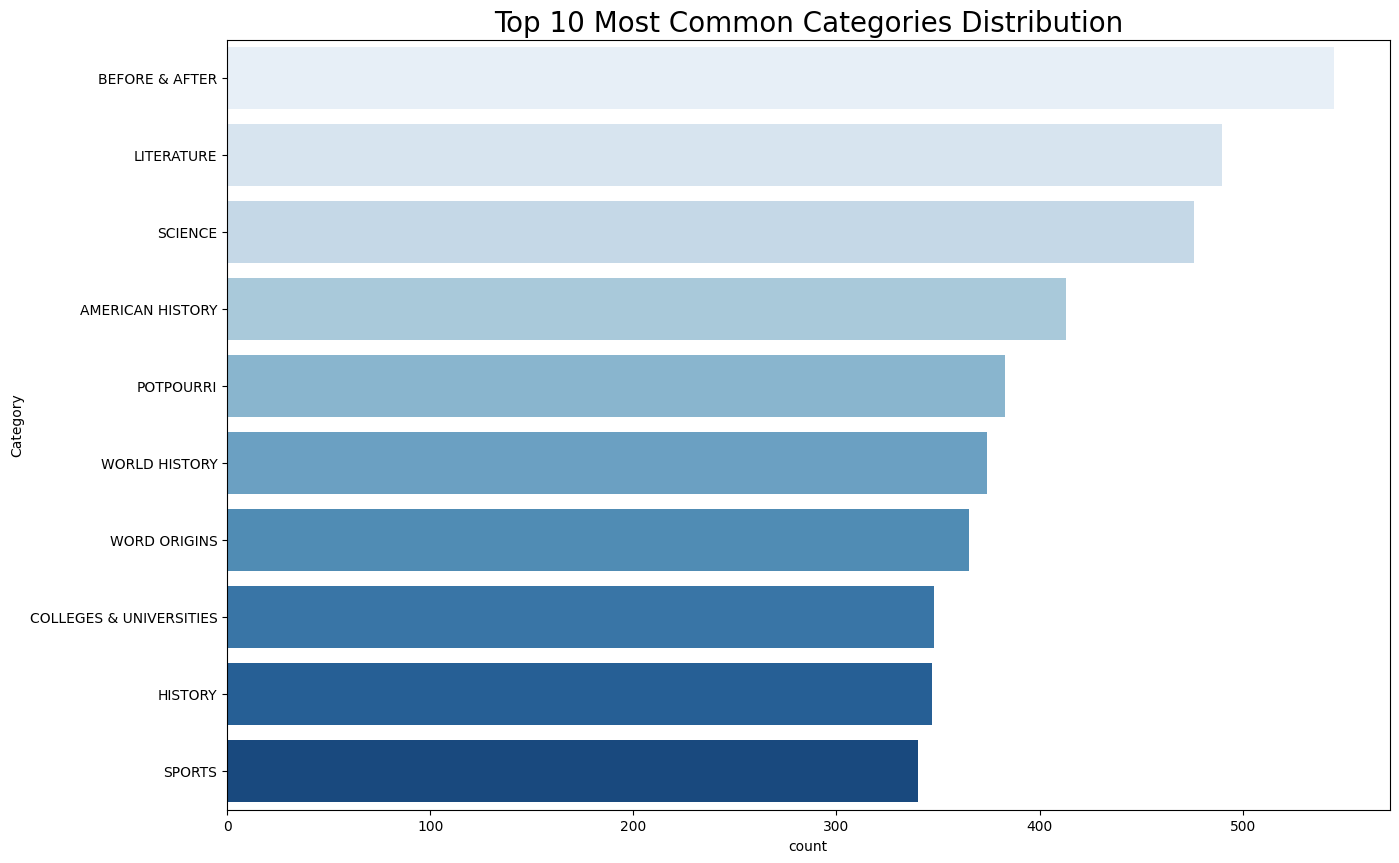

In [39]:
print("Number of unique categories:", len(jeopardy_df['Category'].unique()))

print("10 most common cateogires")
top10_c= jeopardy_df['Category'].value_counts()[:10]
print(top10_c)


mask1 = jeopardy_df[jeopardy_df['Question'] == ('[audio clue]')]
mask2 = jeopardy_df[jeopardy_df['Question'] == ('[video clue]')]
mask3 = jeopardy_df[jeopardy_df['Question'] == ('[filler]')]
mask4 = jeopardy_df[jeopardy_df['Question'] == ('(audio clue)')]

jeopardy_df.drop(mask1.index, inplace = True) 
jeopardy_df.drop(mask2.index, inplace = True)
jeopardy_df.drop(mask3.index, inplace = True)
jeopardy_df.drop(mask4.index, inplace = True)
jeopardy_df.shape

print(jeopardy_df['Question'].value_counts()[:10])

# Visualize top 10 common categories
mask_c = jeopardy_df['Category'].map(lambda x: x in top10_c.index.tolist())

sns.countplot(y='Category', data=jeopardy_df[mask_c], palette=sns.color_palette("Blues", 10), order=top10_c.index.tolist())
plt.gcf().set_size_inches(15,10)
plt.title('Top 10 Most Common Categories Distribution', size=20)
plt.savefig("top10_categories.png")

print("10 most common questions")
print(jeopardy_df['Question'].value_counts()[:10])

## Modeling NER

In [59]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 3.5 MB/s eta 0:00:0000:0100:04
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [40]:
import spacy
nlp_web = spacy.load("en_core_web_lg")

ner_results = []

for document in jeopardy_df['Document']:
    text = str(document)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

jeopardy_df['ner_results'] = ner_results

In [42]:
display(jeopardy_df['ner_results'])

0          ((the, last, 8, years), (Galileo), (Copernicus))
1         ((2), (1912), (Carlisle, Indian, School), (6),...
2         ((Yuma), (4,055, hours), (each, year), (Arizona))
3         ((1963), (The, Art, Linkletter, Show), (billio...
4         ((Indep), (Constitution), (Mass.), (second), (...
                                ...                        
216925                         ((Puccini), (3), (Turandot))
216926                        ((North, America), (only, 4))
216927       ((Penny, Lane), (Hellraiser), (Clive, Barker))
216928             ((Sill), (Okla.), (Arizona), (Geronimo))
216929                                ((18th), (Catherine))
Name: ner_results, Length: 206153, dtype: object

In [43]:
# What is the average number of entities per document?
avg_ent_doc = jeopardy_df['ner_results'].apply(len).mean()
print("The average number of entities per document is", avg_ent_doc)



# What is the average number of entities of each type per document?
ent_type_counts = {}
total_doc = len(jeopardy_df)

# Iterate ner_results column to count entity types
for ner_result in jeopardy_df['ner_results']:
    for ent in ner_result:
        ent_type_counts[ent.label_] = ent_type_counts.get(ent.label_, 0) + 1

# Calculate the average
avg_ent_type_per_doc = {}
for ent_type, count in ent_type_counts.items():
    avg_ent_type_per_doc[ent_type] = count / total_doc

print("Average number of entities of each type per document:")
print(avg_ent_type_per_doc)

The average number of entities per document is 2.524634616037603
Average number of entities of each type per document:
{'DATE': 0.3374872061042042, 'PRODUCT': 0.029031835578429612, 'ORG': 0.3249091694033073, 'CARDINAL': 0.18874816277230988, 'PERSON': 0.6679068458863078, 'GPE': 0.3624589503912143, 'TIME': 0.009235858803898076, 'WORK_OF_ART': 0.2030627737651162, 'LAW': 0.005253379771334882, 'ORDINAL': 0.06686296100469069, 'QUANTITY': 0.02283255640228374, 'FAC': 0.035628877581213955, 'LOC': 0.06585885240573748, 'NORP': 0.15857639714192856, 'EVENT': 0.024253830892589485, 'PERCENT': 0.004181360445882427, 'MONEY': 0.00968698005850024, 'LANGUAGE': 0.008658617628654447}


In [44]:
import heapq
# What is the most common span for each entity type?

# Initialize a dictionary to store spans for each entity type
ent_type_spans = {}

# Iterate over the 'ner_results' column
mask = jeopardy_df['Air Date'] == "2012"
year = jeopardy_df[mask]
display(year)


for ner_result in jeopardy_df['ner_results']:
    for ent in ner_result:
        ent_type = ent.label_
        span_text = ent.text

        if ent_type not in ent_type_spans:
            ent_type_spans[ent_type] = {}
        
        ent_type_spans[ent_type][span_text] = ent_type_spans[ent_type].get(span_text, 0) + 1

# most common span per type
max_span_per_type = {}

# for ent_type, span_text in ent_type_spans.items():
#     max_span = max(span_text, key = span_text.get)
#     max_span_per_type[ent_type] = max_span

# max_spans_per_type = {}

for ent_type, span_text in ent_type_spans.items():
    top_spans = heapq.nlargest(10, span_text.items(), key=lambda x: x[1])
    max_span_per_type[ent_type] = dict(top_spans)

print('Most common span for each entity type:')
for ent_type in max_span_per_type:
    print(ent_type, ":", max_span_per_type[ent_type])

ent_type_spans

,Show Number,Air Date,Round,Category,Value,Question,Answer,Document,ner_results
1915,6294,2012,Jeopardy!,"A SHAKESPEARE PLAY, FOR OPENERS",$200,This play opens on the battlements of the cast...,Hamlet,This play opens on the battlements of the cast...,"((Barnardo), (Hamlet))"
1916,6294,2012,Jeopardy!,THAT'S BUSINESS,$200,He started a book business from his home in 18...,(Charles M.) Barnes,He started a book business from his home in 18...,"((1873), (William), (G., Clifford, Noble), (19..."
1917,6294,2012,Jeopardy!,NURSERY RHYMES,$200,"Peter, Peter was an eater of this; he kept his...",pumpkin,"Peter, Peter was an eater of this; he kept his...","((Peter), (Peter))"
1918,6294,2012,Jeopardy!,INLETS,$200,This largest Alaskan city lies at the head of ...,Anchorage,This largest Alaskan city lies at the head of ...,"((Alaskan), (the, Kenai, peninsula), (Anchorage))"
1919,6294,2012,Jeopardy!,"THE EVOLUTION OF ""M""USIC",$200,"This '60s ""Nights in White Satin"" band has ano...",Moody Blues,"This '60s ""Nights in White Satin"" band has ano...","((This, ', 60s), (Nights, in, White, Satin), (..."
...,...,...,...,...,...,...,...,...,...
192273,6292,2012,Double Jeopardy!,I PLAYED A DOCTOR & SOME OTHER GUY ON TV,$2000,"Marcus Welby & Jim Anderson (the ""Father"" who ...",Robert Young,"Marcus Welby & Jim Anderson (the ""Father"" who ...","((Marcus, Welby), (Jim, Anderson), (Knows, Bes..."
192274,6292,2012,Double Jeopardy!,CLASSICAL MUSIC,$2000,This composer of Armenian heritage is best kno...,(Aram) Khachaturian,This composer of Armenian heritage is best kno...,"((Armenian), (Sabre, Dance), (Gayane), (Aram))"
192275,6292,2012,Double Jeopardy!,POSSESSIVE BOOK TITLES,$2000,"Kim Edwards: ""The ____ ____'s Daughter"" (2005)",The Memory Keeper's Daughter,"Kim Edwards: ""The ____ ____'s Daughter"" (2005)...","((Kim, Edwards), (2005), (The, Memory, Keeper,..."
192276,6292,2012,Double Jeopardy!,"""TRI"" TIPS",$2000,This was an ancient Roman warship with multipl...,a trireme,This was an ancient Roman warship with multipl...,"((Roman), (trireme))"


Most common span for each entity type:
DATE : {'1996': 700, '1997': 652, '1999': 650, '1998': 625, '1995': 558, '2000': 517, '1984': 515, '1992': 502, '1994': 501, '1989': 484}
PRODUCT : {'Galileo': 103, 'Saturn': 45, 'Comet': 42, 'Cherokee': 37, 'Grammy': 37, 'Magellan': 32, 'Discovery': 31, 'Crown': 29, 'Atlantis': 29, 'Apache': 28}
ORG : {'Congress': 373, 'Senate': 279, 'NBA': 278, 'House': 267, 'NFL': 256, 'Lincoln': 219, 'U.N.': 211, 'Disney': 207, 'State': 190, 'Genesis': 179}
CARDINAL : {'one': 5524, '2': 5382, '3': 2687, '1': 1828, '4': 1684, 'One': 1491, '5': 1141, '6': 828, '7': 768, '10': 643}
PERSON : {'Shakespeare': 431, 'Oscar': 411, 'John': 346, 'Sarah': 249, 'Jesus': 237, 'Mary': 216, 'Elizabeth': 212, 'David': 196, 'Jr.': 192, 'Paul': 173}
GPE : {'U.S.': 4009, 'California': 943, 'France': 893, 'England': 817, 'Washington': 757, 'Texas': 688, 'London': 685, 'New York': 651, 'Paris': 651, 'India': 587}
TIME : {'night': 84, 'the night': 66, 'morning': 50, 'tonight': 45, '

{'DATE': {'the last 8 years': 1,
  '1912': 192,
  'each year': 44,
  '1963': 332,
  'today': 439,
  'the winter of 1971-72': 1,
  'June 28, 1994': 1,
  '1960': 321,
  '1889': 123,
  'the 1920s': 132,
  "'27 & '36": 1,
  '1935': 215,
  '1898': 113,
  '1939': 251,
  '1885': 76,
  "the late '70s": 7,
  '1954-1955': 1,
  '2003': 417,
  '2001': 436,
  '2004': 414,
  '1553': 4,
  '1559': 5,
  '1979': 344,
  '1961': 322,
  '1797': 29,
  'the day': 140,
  "the previous season's": 1,
  '1930s': 111,
  '2009': 345,
  'Jan. 12, 2010': 1,
  '2010': 229,
  '1977': 338,
  '11-year-old': 18,
  '1751': 10,
  'January 2010': 1,
  'every 2 years': 4,
  '1999': 650,
  '1967': 356,
  '17': 15,
  "The 19th century's": 1,
  '1985': 379,
  '15th century': 15,
  '1554': 7,
  'some 200 years': 1,
  '15-year': 6,
  '20 years': 59,
  '1962': 366,
  '1862': 89,
  '1904': 129,
  '1801': 22,
  '1965': 334,
  '1941': 193,
  'October 8, 1871': 1,
  '1806': 45,
  'the 1990s': 58,
  'January 1999': 10,
  '1996': 700,
 

In [ ]:
# CONLL dataset to evaluate NER model


In [61]:
pip install spacy-annotator

ERROR: prodigy.whl is not a valid wheel filename.
Note: you may need to restart the kernel to use updated packages.


In [92]:
# annotate?
import spacy_annotator as spa
import spacy

sample_df = pd.read_csv('sample_data.csv')

annotator = spa.Annotator(labels=['GPE', 'PERSON', 'LOC', "DATE", "ORG", "EVENT"], model=nlp_web)
df_labels = annotator.annotate(df=sample_df, col_text='Document', shuffle=True)


HTML(value='-1 examples annotated, 101 examples left')

Text(value='', description='GPE', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='PERSON', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='LOC', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='DATE', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='ORG', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Text(value='', description='EVENT', layout=Layout(width='auto'), placeholder='ent one, ent two, ent three')

Output()

In [96]:
# df_labels.to_csv('df_label')


Spacy file saved to: /Users/sungheepark/Documents/uw23-24/au23/aut2023_info498b/info498_final/annotations.spacy


In [91]:
# Ground truth for 100 questions
ner_results = []

for document in df_labels['Document']:
    text = str(document)
    doc_web = nlp_web(text)
    ner_results.append(doc_web.ents)

df_labels['ner_results'] = ner_results

# for ner_result in df_labels['ner_results']:
#     for ent in ner_result:
#         ent_type = ent.label_
#         span_text = ent.text

#         if ent_type not in ent_type_spans:
#             ent_type_spans[ent_type] = {}
        
#         ent_type_spans[ent_type][span_text] = ent_type_spans[ent_type].get(span_text, 0) + 1
for ner_result in df_labels['ner_results']:
     for ent in ner_result:
        ent_type = ent.label_
        span_text = ent.text
        print(ent_type, span_text)

ORG HBO
PERSON Gabriel Byrne
PERSON Gabourey Sidibe
ORG Mo'nique
GPE Troy
GPE New York
DATE the 1500s to the 1800s
NORP European
PERSON Barbary
DATE 1983
ORG Lisa
ORDINAL first
ORG Apple
CARDINAL one
PERSON Rob Smets
PERSON Sarah
ORG Nestea
LOC Mediterranean
GPE Greece
LOC Aegean Sea
ORDINAL first
ORG Nintendo
WORK_OF_ART Pocket Monsters
NORP French
DATE 1846 to 1849
GPE Salem
GPE Mass.
PERSON Nathaniel Hawthorne
WORK_OF_ART Sherlock Holmes novel
DATE 1902
WORK_OF_ART The Hound of the Baskervilles
PERSON Mel Gibson
PERSON Max
ORDINAL third
WORK_OF_ART Beyond Thunderdome
CARDINAL One
PERSON Pete Weber
PERSON Eric Gagne
NORP American
PERSON Geoffrey
PERSON Johnny
PERSON Roald Dahl
PERSON Charlie
ORG Pentagon
ORG Machias
DATE 4-year
GPE U.S.
GPE Maine
ORG Mont-Louis & Monte Perdido
GPE Pyrenees
DATE 1913
PERSON Harry Brearley
GPE Sheffield
GPE England
CARDINAL 1400
DATE 1777
GPE New Connecticut
GPE Vermont
MONEY 10,000
PERSON Sarah Bernhardt
ORG Roanoke
DATE 158 year
ORG tradition &
DATE 